In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv('CompleteDataset.csv')


In [19]:
%matplotlib inline

In [53]:
# df.Wage = df.Wage.apply(lambda x: float(x[1:-1]) * 1000 if x[1:-1] else 0.0)
# df.Value = df.Value.apply(lambda x: float(x[1:-1]) * 1000000 if x[1:-1] else 0.0)
# df.Age = df.Age.apply(lambda x: int(x))
# df['Ball control'] = df['Ball control'].apply(lambda x: int(x))
df['Jumping'].apply(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '74+1'

In [49]:
df[['Name', 'Nationality', 'Age', 'Value', 'Wage', 'Ball control', 'Penalties']].head()

Name Nationality  Age        Value      Wage Ball control  \
0  Cristiano Ronaldo    Portugal   32   95500000.0  565000.0           93   
1           L. Messi   Argentina   30  105000000.0  565000.0           95   
2             Neymar      Brazil   25  123000000.0  280000.0           95   
3          L. Suárez     Uruguay   30   97000000.0  510000.0           91   
4           M. Neuer     Germany   31   61000000.0  230000.0           48   

  Penalties  
0        85  
1        74  
2        81  
3        85  
4        47

In [27]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null float64
Wage                   17981 non-null float64
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null o

# Гистограмма распределения возраста игроков

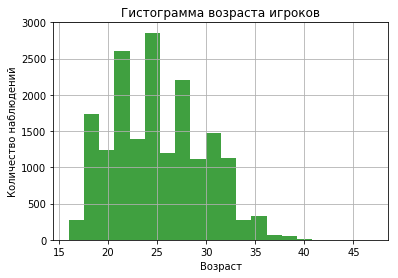

In [10]:
num_bins = 20
fig, ax = plt.subplots()
n, bins, patches = ax.hist(df['Age'], num_bins, facecolor='green', alpha=0.75)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество наблюдений')
ax.set_title('Гистограмма возраста игроков')
# ax.axis([40, 160, 0, 0.03])
ax.grid(True)

# Диаграмма рассеяния 
Показывает связь между двумя переменными. Зависимость зарплаты от возраста игрока

Text(0, 0.5, 'Зарплата')

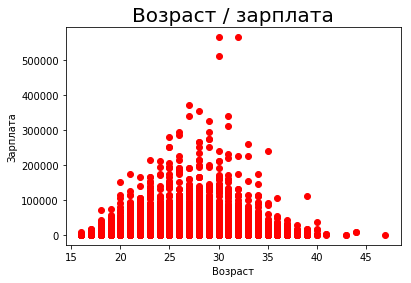

In [11]:
# plt.plot(df['Age'], label='Возраст')
plt.scatter(df['Age'], df['Wage'], color='red')
plt.title('Возраст / зарплата', fontdict={'fontsize': 20})
plt.xlabel('Возраст')
plt.ylabel('Зарплата')
# plt.legend()
# plt.xticks(range(0, 20, 4))

Text(0, 0.5, 'Стоимость')

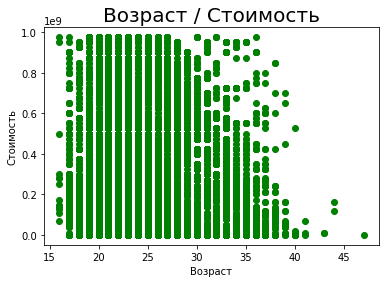

In [15]:
plt.scatter(df['Age'], df['Value'], color='green')
plt.title('Возраст / Стоимость', fontdict={'fontsize': 20})
plt.xlabel('Возраст')
plt.ylabel('Стоимость')

In [66]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [68]:
club_df = df.groupby('Club', as_index = False).Name.count()
trace = go.Scatter(
    x = club_df.Club,
    y = club_df.Name
)
layout = go.Layout(
    title='Клубы по количеству игроков',
)

fig = go.Figure(data = [trace], layout = layout)
iplot(fig)